# **GRL2021**


This script is an example file showing how to import atmospheric river data (semi-raw) from Github used in the paper: ***Are multiseasonal forecasts of atmospheric rivers possible? ***. One should notice that due to the storage limitation of Github and policy of GFDL, all files are saved with a post-process form (i.e., AR). If you are interested in the raw data for detecting ARs (e.g., u, v and q), please contact corresponding author **Kai-Chih Tseng**: kaichiht@princeton.edu


Code instruction:

1.   Please copy this file to your googledrive (or local machine) before using it
2.  ram for analyzing this data can't be less than 25GB



## Step 1: Setup environment

In [ ]:
# environment setup
!pip install netcdf4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from netCDF4 import Dataset as NetCDFFile
import random 
import timeit
import pickle
from scipy import stats
!pip install wget
import wget

     |████████████████████████████████| 4.3MB 13.0MB/s 
     |████████████████████████████████| 296kB 47.8MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6ec7a5a509629d29d83ef1b3c6a70c230d64f7de6c9363d8d010d02be49b3f56
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


## Step 2: retrieve data from Github
after executing the following 2 cells, you should have four variables 


(1) "AR_anomaly_model" (unit=day/day) from SPEAR with dimension
>*   season = Jan, Apr, Jul, Oct
*   ens    = 15 ensemble members
*   initial year  = 1995-2017
*   forecast time = 0-11 months
*   lat           = 20.25N-89.25N (0.5 degree)
*   lon           = 100E-60W   (0.625 degree)

(2) "AR_anomaly_obs" (unit=day/day) from ERA5 with dimension
>*  time  = Jan 1995 - Dec 2017 (monthly)
*   lat           = 20.25N-89.25N (0.5 degree)
*   lon           = 100E-60W   (0.625 degree)

(3) "sst_anomaly_model" (unit=K) from SPEAR with dimension
>*   season = Jan, Apr, Jul, Oct
*   ens    = 15 ensemble members
*   initial year  = 1995-2017
*   forecast time = 0-11 months
*   lat           = 79.75S-79.75N  (0.5 degree)
*   lon           = 0E -2.5W   (0.625 degree)

(4) "sst_anomaly_obs" (unit=K) from ERA5 with dimension
>*  time  = Jan 1995 - Dec 2017  (monthly)
*   lat           = 79.75S-79.75N  (0.5 degree)
*   lon           = 0E -2.5W   (0.625 degree)


In [ ]:
# clear current folder
import glob, os
for f in glob.glob("*.npz"):
    os.remove(f)

if 'AR_anomaly_model' in locals():
    del AR_anomaly_model
if 'AR_anomaly_obs' in locals():
    del AR_anomaly_obs
if 'sst_anomaly_model' in locals():
    del sst_anomaly_model
if 'sst_anomaly_obs' in locals():
    del sst_anomaly_obs


pcs        = np.zeros((1000,16560))
EOF        = np.zeros((1000,139,319))

# downloading data from Github
for i in range(1,5):
    url='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF'+str(i)+'.npz'
    print(url)
    filename         = wget.download(url)
    data             = np.load('/content/model_EOF'+str(i)+'.npz')
    EOF[250*(i-1):250*(i-1)+250] = data['EOF']
EOF = np.reshape(EOF,[1000,139*319])

for i in range(1,3):
    url='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs'+str(i)+'.npz'
    print(url)
    filename         = wget.download(url)
    data             = np.load('/content/model_pcs'+str(i)+'.npz')
    pcs[500*(i-1):500*(i-1)+500] = data['pcs_ar']

AR_anomaly_model = np.matmul(np.transpose(pcs),EOF)
AR_anomaly_model = np.reshape(AR_anomaly_model,[4,15,23,12,139,319])


url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/obs.npz'
filename        = wget.download(url)
data            = np.load('/content/obs.npz')
pcs_obs_ar      = data['pcs_obs_ar']
EOF             = data['EOF']
EOF             = np.reshape(EOF,[276,139*319])
AR_anomaly_obs  = np.matmul(np.transpose(pcs_obs_ar),EOF)
AR_anomaly_obs  = np.reshape(AR_anomaly_obs,[276,139,319])


https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF1.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF2.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF3.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF4.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs1.npz
https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs2.npz


In [ ]:
del AR_anomaly_obs
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/obs_sst.npz'
filename        = wget.download(url)
data            = np.load('/content/obs_sst.npz')
pcs_obs_sst     = data['pcs_obs_sst']
EOF             = data['EOF'][:,20:340,:]
EOF             = np.reshape(EOF,[20,320*574])
sst_anomaly_obs = np.matmul(np.transpose(pcs_obs_sst),EOF)
sst_anomaly_obs = np.reshape(sst_anomaly_obs,[276,320,574])

url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_pcs_sst.npz'
filename        = wget.download(url)
data            = np.load('/content/model_pcs_sst.npz')
pcs_sst         = data['pcs_sst']

url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/model_EOF_sst.npz'
filename        = wget.download(url)
data            = np.load('/content/model_EOF_sst.npz')
EOF             = data['EOF'][:,20:340,:]
EOF             = np.reshape(EOF,[20,320*574])
sst_anomaly_model = np.matmul(np.transpose(pcs_sst),EOF)
sst_anomaly_model = np.reshape(sst_anomaly_model,[4,15,23,12,320,574])

(20, 359, 574)

## Step 3: Data Visualization
The example here shows the ensemble mean of AR frequency for the forecast made in Jan 1995 with target month: Jan 1995. 

([<matplotlib.axis.XTick at 0x7f163b41a240>,
 [Text(0, 0, '$120^oE$'),
  Text(0, 0, '$150^oE$'),
  Text(0, 0, '$180^oE$'),
  Text(0, 0, '$150^oW$'),
  Text(0, 0, '$120^oW$'),
  Text(0, 0, '$90^oW$'),
  Text(0, 0, '$60^oW$')])

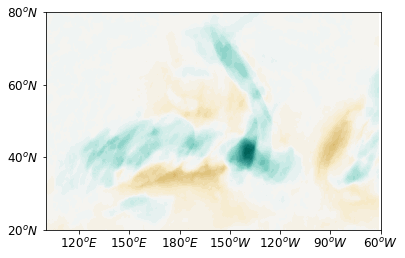

In [ ]:
# visualize the model AR anomaly
clevs   = np.arange(-0.24,0.25,0.01)
y       = np.arange(20,89.75-0.5,0.5)
x       = np.arange(100,300-0.625,0.625)
lat,lon = np.meshgrid(y,x)

plt.figure()
plt.contourf(x,y,AR_anomaly_model[0,:,0,0,:,:].mean(axis=0),clevs,cmap='BrBG')
plt.xlim(100,300)
plt.xticks([120,150,180,210,240,270], [],fontsize=15)
plt.ylim(20,75)
plt.yticks([20,40,60,80], ['$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'],fontsize=12)
plt.xticks([120,150,180,210,240,270,300], ['$120^oE$', '$150^oE$', '$180^oE$', '$150^oW$', '$120^oW$','$90^oW$','$60^oW$'],fontsize=12)

# visualize the EAR5 AR anomaly    

## Additional Content for visualization

Previously codes shows how load the (semi-raw) data used in the main text. 
For convience, we also organize the data that has been directly used in the figures. This part of code is for visualization purpose.


Text(0.5, 0, '(AR day)/day')

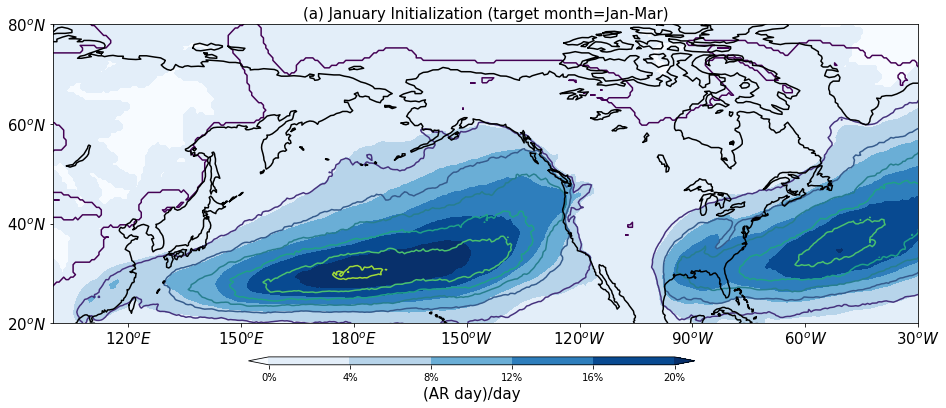

In [ ]:
# load file for FIG1
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/FIG1.npz'
filename        = wget.download(url)
data            = np.load('/content/FIG1.npz')
Jan_obs_clim    = data['Jan_obs_clim']
Apr_obs_clim    = data['Apr_obs_clim']
Jul_obs_clim    = data['Jul_obs_clim']
Oct_obs_clim    = data['Oct_obs_clim']
Jan_clim        = data['Jan_clim']
Apr_clim        = data['Apr_clim']
Jul_clim        = data['Jul_clim']
Oct_clim        = data['Oct_clim']
xx              = data['xx']
yy              = data['yy']


# for map plotting 
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/lat.bin'
filename        = wget.download(url)
f               = open("/content/lat.bin", "r")
costal_lat      = np.fromfile(f, np.float32)

url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/lon.bin'
filename        = wget.download(url)
f               = open("/content/lon.bin", "r")
costal_lon      = np.fromfile(f, np.float32)  


fig=plt.figure()
clevs=np.arange(0,0.24,0.04)
cs=plt.contourf(xx,yy,Jan_clim,clevs,cmap='Blues',extend='both')
plt.plot(costal_lon,costal_lat,color='k')
plt.contour(xx,yy,Jan_obs_clim,[0,0.04,0.08,0.12,0.16,0.2,0.24,0.28])
plt.xlim(100,330)
plt.xticks([120,150,180,210,240,270,300,330], ['$120^oE$', '$150^oE$', '$180^oE$', '$150^oW$', '$120^oW$','$90^oW$','$60^oW$','$30^oW$'],fontsize=15)
plt.ylim(20,80)
plt.yticks([20,40,60,80], ['$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'],fontsize=15)
plt.title('(a) January Initialization (target month=Jan-Mar)',fontsize=15)


fig.set_size_inches(15.5, 5.5)
cbar_ax = fig.add_axes([0.3, 0.02, 0.4, 0.02])   
#cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar = fig.colorbar(cs, cax=cbar_ax, ticks=[0, 0.04, 0.08, 0.12, 0.16, 0.20],orientation='horizontal')
cbar.ax.set_xticklabels(['0%', '4%', '8%','12%','16%','20%'])  # horizontal colorbar
cbar.ax.set_xlabel('(AR day)/day',fontsize=15)  # horizontal colorbar


Text(0.5, 1.0, '(a) Jan Initialization')

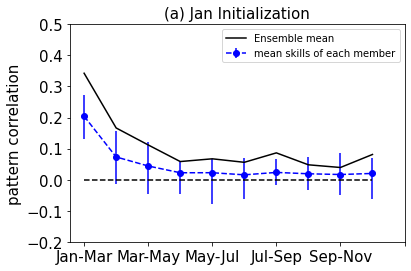

In [ ]:
#load file for Figure 2
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/FIG2.npz'
filename        = wget.download(url)
data            = np.load('/content/FIG2.npz')
Jan_skill       = data['Jan_skill']
Apr_skill       = data['Apr_skill']
Jul_skill       = data['Jul_skill']
Oct_skill       = data['Oct_skill']

x_axis      = np.arange(1,11,1)        
fig=plt.figure()
lower_bound = Jan_skill[:,0:15].mean(axis=1)-Jan_skill[:,0:15].min(axis=1)
upper_bound = Jan_skill[:,0:15].max(axis=1)-Jan_skill[:,0:15].mean(axis=1)
plt.errorbar(x_axis, Jan_skill[:,0:14].mean(axis=1), yerr=[lower_bound, upper_bound], fmt='--o',color='b')
plt.plot(x_axis,Jan_skill[:,15],'k')
plt.legend(['Ensemble mean','mean skills of each member'],fontsize=10)
plt.plot(x_axis,x_axis*0,'k--')
plt.xticks(np.arange(1,12,2), ('Jan-Mar','Mar-May','May-Jul','Jul-Sep','Sep-Nov'),fontsize=15)
plt.yticks(np.arange(-0.2,0.6,0.1),fontsize=15)
plt.ylim(-0.2, 0.5)    
plt.ylabel('pattern correlation',fontsize=15)
plt.title('(a) Jan Initialization',fontsize=15)


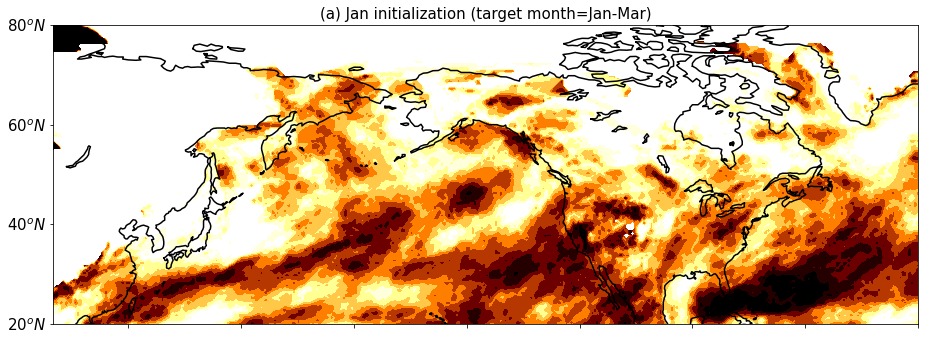

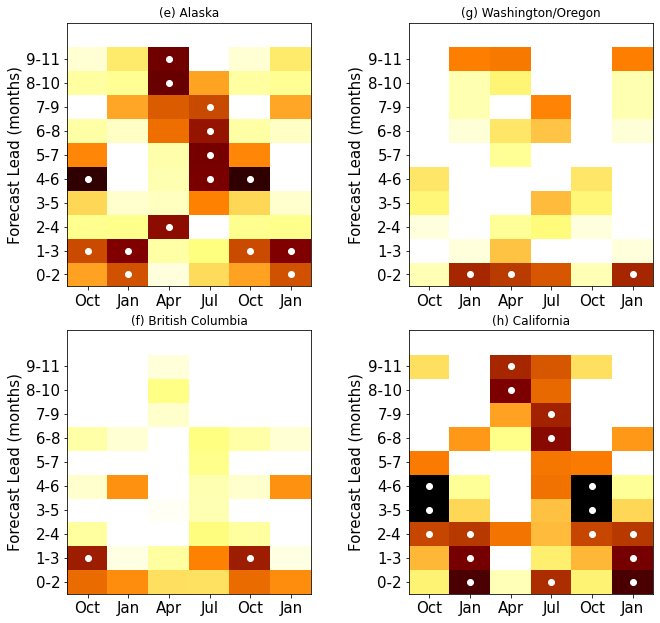

In [ ]:
#load file for Figure 3
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/FIG3.npz'
filename        = wget.download(url)
data            = np.load('/content/FIG3.npz')
Jan_map         = data['Jan_map']
Apr_map         = data['Apr_map']
Jul_map         = data['Jul_map']
Oct_map         = data['Oct_map']
ACC             = data['ACC']
my_map          = 'afmhot_r'

clevs=np.arange(0.0,0.8,0.1)
fig=plt.figure()
cs=plt.contourf(xx,yy,Jan_map,clevs,cmap=my_map,extend='both')
plt.plot(costal_lon,costal_lat,color='k')
plt.xticks(np.arange(0.5,6,1), (''))
plt.xlim(100,330)
plt.xticks([120,150,180,210,240,270,300,330], ['', '', '', '', '','','',''],fontsize=15)
plt.ylim(20,80)
plt.yticks([20,40,60,80], ['$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'],fontsize=15)
plt.title('(a) Jan initialization (target month=Jan-Mar)',fontsize=15)
fig.set_size_inches(15.5, 5.5)

title_list = ['(e) Alaska','(f) British Columbia','(g) Washington/Oregon','(h) California']
fig        = plt.figure()
grid       = plt.GridSpec(4, 2, wspace=0.4, hspace=0.4)
score      = np.zeros((12,6))

for i in range(0,2):
    plt.subplot(grid[0:2, 0+i])
    score[0:10,1:5]=ACC[i*2,0:10,:]
    score[:,0]=score[:,4]
    score[:,5]=score[:,1]
    plt.pcolor(score,cmap=my_map, vmin=0, vmax=0.7)
    t = score*np.sqrt(23-2)/np.sqrt(1-score*score)
    x_location,y_location=np.where(t>2.07)
    plt.scatter(y_location+0.5,x_location+0.5,color='white')
    #plt.colorbar(cs)
    plt.xticks(np.arange(0.5,6,1), ('Oct','Jan','Apr','Jul','Oct','Jan'),fontsize=15)
    plt.yticks(np.arange(0.5,10,1),('0-2','1-3','2-4','3-5','4-6','5-7','6-8','7-9','8-10','9-11'),fontsize=15)
    plt.title(title_list[i*2])
    plt.ylim([0,11])
    plt.ylabel('Forecast Lead (months)',fontsize=15)
    
    plt.subplot(grid[2:4, 0+i])
    score[0:10,1:5]=ACC[i*2+1,0:10,:]
    score[:,0]=score[:,4]
    score[:,5]=score[:,1]
    plt.pcolor(score,cmap=my_map, vmin=0, vmax=0.7)
    t = score*np.sqrt(23-2)/np.sqrt(1-score*score)
    x_location,y_location=np.where(t>2.07)
    plt.scatter(y_location+0.5,x_location+0.5,color='white')
    #plt.colorbar(cs)
    plt.xticks(np.arange(0.5,6,1), ('Oct','Jan','Apr','Jul','Oct','Jan'),fontsize=15)
    plt.yticks(np.arange(0.5,10,1),('0-2','1-3','2-4','3-5','4-6','5-7','6-8','7-9','8-10','9-11'),fontsize=15)
    plt.title(title_list[i*2+1])
    plt.ylim([0,11])
    plt.ylabel('Forecast Lead (months)',fontsize=15)
fig.set_size_inches(10.5, 10.5)

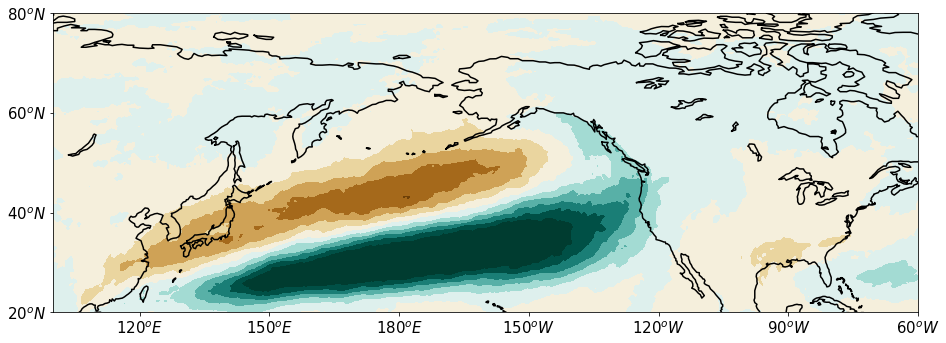

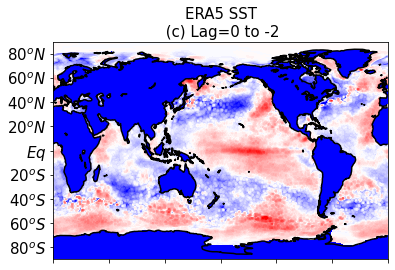

In [ ]:
#load file for Figure 4
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/FIG4.npz'
filename        = wget.download(url)
data            = np.load('/content/FIG4.npz')
SST1_obs        = data['SST1_obs']    # lag 0-2
SST1_model      = data['SST1_model']  # lag 0-2
SST2_obs        = data['SST2_obs']    # lag 3-5
SST2_model      = data['SST2_model']  # lag 3-5
SST3_obs        = data['SST3_obs']    # lag 6-8
SST3_model      = data['SST3_model']  # lag 6-8
EOF_obs_ar      = data['EOF_obs_ar']  # lag 0
EOF_ar          = data['EOF_ar']      # lag 0
u_composite     = data['u_composite']
v_composite     = data['v_composite']

fig=plt.figure()
clevs2=np.arange(-0.05,0.06,0.01)    
cs=plt.contourf(xx,yy,EOF_obs_ar[0,:,:],clevs2,cmap='BrBG',extend='both')
plt.plot(costal_lon,costal_lat,color='k')
fig.set_size_inches(15.5, 5.5)
plt.xlim(100,300)
plt.xticks([120,150,180,210,240,270], [],fontsize=15)
plt.ylim(20,75)
plt.yticks([20,40,60,80], ['$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'],fontsize=15)
plt.xticks([120,150,180,210,240,270,300], ['$120^oE$', '$150^oE$', '$180^oE$', '$150^oW$', '$120^oW$','$90^oW$','$60^oW$'],fontsize=15)


clevs=np.arange(-0.3,0.31,0.01) 
plt.figure()
plt.contourf(xx,yy,SST1_obs,clevs,extend='both',cmap='bwr')
plt.plot(costal_lon,costal_lat,color='k')
plt.xlim(0,360)
plt.yticks([-80,-60,-40,-20,0, 20,40,60,80], ['$80^oS$', '$60^oS$', '$40^oS$', '$20^oS$', '$Eq$', '$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'],fontsize=15)
plt.title('ERA5 SST\n (c) Lag=0 to -2',fontsize=15)
plt.xticks([0, 60, 120, 180,240,300,360], ['', '','', '', '', '', ''],fontsize=15)
fig.set_size_inches(15.5, 5.5)

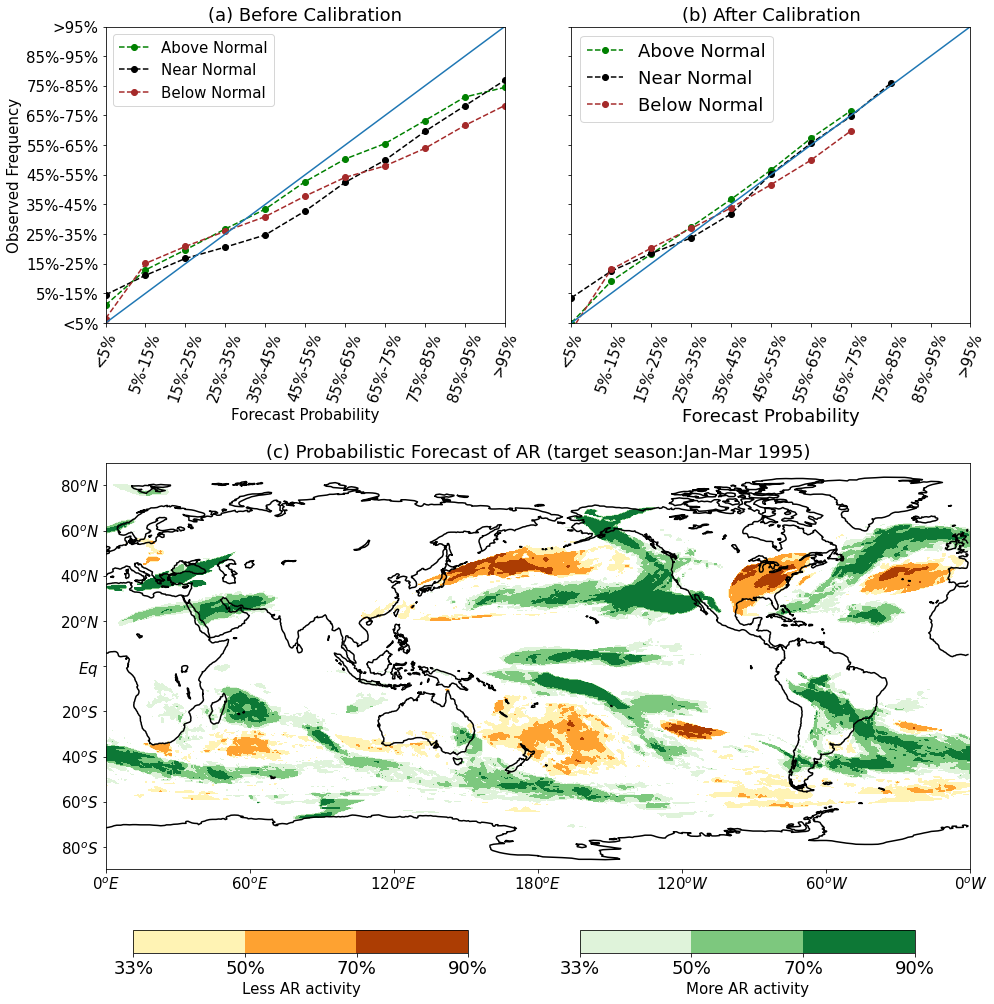

In [ ]:
# FIG5
url             ='https://github.com/kuiper2000/kuiper2000.github.io/raw/master/publication/AR_seasonal_prediction/FIG5.npz'
filename        = wget.download(url)
data            = np.load('/content/FIG5.npz')
above_before_calibration    = data['above_before']    
near_before_calibration     = data['near_before']  
below_before_calibration    = data['below_before']  
above_after_calibration     = data['above_after']  
near_after_calibration      = data['near_after']  
below_after_calibration     = data['below_after'] 

above_map                   = data['above_map']  
below_map                   = data['below_map'] 

grid   = plt.GridSpec(8, 4, wspace=0.4, hspace=0.4)

fig=plt.figure()
plt.subplot(grid[0:3, 0:2])
x=['<5%','5%-15%','15%-25%','25%-35%','35%-45%','45%-55%','55%-65%','65%-75%','75%-85%','85%-95%','>95%']
x2=np.arange(0,11,1)
plt.plot(x2,above_before_calibration,color='green',linestyle='--',marker='o')
plt.plot(x2,near_before_calibration,color='black',linestyle='--',marker='o')
plt.plot(x2,below_before_calibration,color='brown',linestyle='--',marker='o')
plt.legend(['Above Normal','Near Normal','Below Normal'],fontsize=15)
plt.ylabel('Observed Frequency',fontsize=15)
plt.xlabel('Forecast Probability',fontsize=15)
plt.xticks(x2, x,fontsize=15)
plt.yticks(x2/10, x,fontsize=15)
plt.xticks(rotation=70)
plt.xlim(0,10)
plt.ylim(0,1)
x2=np.arange(0,1.1,0.1)
plt.plot(x2*10,x2)
plt.title('(a) Before Calibration',fontsize=18)


plt.subplot(grid[0:3, 2:4])
x2=np.arange(0,11,1)
plt.plot(x2,above_after_calibration,color='green',linestyle='--',marker='o')
plt.plot(x2,near_after_calibration,color='black',linestyle='--',marker='o')
plt.plot(x2,below_after_calibration,color='brown',linestyle='--',marker='o')
plt.legend(['Above Normal','Near Normal','Below Normal'],fontsize=18)
plt.xlabel('Forecast Probability',fontsize=18)
plt.xticks(x2, x,fontsize=15)
x=['','','','','','','','','','','']
plt.yticks(x2/10, x,fontsize=15)
plt.xticks(rotation=70)
plt.xlim(0,10)
plt.ylim(0,1)
x2=np.arange(0,1.1,0.1)
plt.plot(x2*10,x2)
fig.set_size_inches(15.5, 4.5)
plt.title('(b) After Calibration',fontsize=18)

plt.subplot(grid[4:8, 0:4])
clevs=[0.33,0.5,0.7,0.9]
above_map[np.abs(above_map)<0.33]=0
cs1  = plt.contourf(xx,yy,above_map,clevs,cmap='Greens')

clevs=[0.33,0.5,0.7,0.9]
below_map[np.abs(below_map)<0.33]=0
cs2  = plt.contourf(xx,yy,below_map,clevs,cmap='YlOrBr')
plt.title('(c) Probabilistic Forecast of AR (target season:Jan-Mar 1995)',fontsize=18)


plt.plot(costal_lon,costal_lat,color='k')
plt.yticks([-80,-60,-40,-20,0, 20,40,60,80], ['$80^oS$', '$60^oS$', '$40^oS$', '$20^oS$', '$Eq$', '$20^oN$', '$40^oN$', '$60^oN$', '$80^oN$'],fontsize=15)
plt.xticks([0, 60, 120, 180,240,300,360], ['$0^oE$', '$60^oE$','$120^oE$', '$180^oE$', '$120^oW$', '$60^oW$', '$0^oW$'],fontsize=15)
plt.xlim([0,360])
fig.set_size_inches(10.5, 5.5)

cbar_ax = fig.add_axes([0.15, 0.05, 0.3, 0.02])
clevs=[0.33,0.5,0.7,0.9]
cbar = fig.colorbar(cs2, cax=cbar_ax, ticks=clevs,boundaries=clevs,orientation='horizontal')
cbar.ax.set_xticklabels(['33%','50%','70%','90%'],fontsize=18)  # horizontal colorbar
cbar.ax.set_xlabel('Less AR activity',fontsize=15)  # horizontal colorbar


cbar_ax = fig.add_axes([0.55, 0.05, 0.3, 0.02])
clevs=[0.33,0.5,0.7,0.9]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=clevs,orientation='horizontal')
cbar.ax.set_xticklabels(['33%','50%','70%','90%'],fontsize=18)  # horizontal colorbar
cbar.ax.set_xlabel('More AR activity',fontsize=15)              # horizontal colorbar
fig.set_size_inches(15.5, 15.5)
